In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
import config
import pickle


In [2]:
with open(config.ADDITIONAL, 'rb') as file:
        classes, label_to_id, id_to_label = pickle.load(file)

In [7]:
X = np.load(f'data_features/X_train_b0.npy')
y = np.load(f'data_features/y_train_b0.npy')

print(f"Training data shape: {X.shape}, labels shape: {y.shape}")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=1337)
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

Training data shape: (45263, 1280), labels shape: (45263,)


/home/lolvista/anaconda3/envs/.cv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [8]:
average = 'micro'
# Check on validation
val_preds= np.argmax(clf.predict_proba(X_val), axis=1)
print(f"On validation set:")
print(f"F1: {f1_score(y_val, val_preds, average=average)}")

On validation set:
F1: 0.9580573951434879


In [9]:
# Get predictions on test set
print("Getting predictions for test set")
X_test = np.load(f'data_features/X_test_b0.npy')
X_test_preds = np.argmax(clf.predict_proba(X_test), axis=1)

Getting predictions for test set


In [10]:
df = pd.DataFrame({'id': np.arange(0, len(X_test_preds)), 'label': X_test_preds})
df_test = pd.read_csv('data/test.csv')
df_pred = df_test.join(df)
df_pred['label_str'] = [id_to_label[i] for i in df_pred['label']]
df_pred = df_pred.rename(mapper={'label':'label_id', 'label_str':'label'}, axis=1)
df_pred

,image_id,id,label_id,label
0,00fd3c23-193c-480a-aef9-bb438d50d79e.jpeg,0,22,ski_race
1,ef5473b9-a558-4f38-acd0-be4ecfde5a23.jpeg,1,4,basketball
2,ba00f9b4-7cbf-4110-91ea-ed41f5cb4ee4.jpeg,2,0,alpinism
3,f1bdf877-4379-4e00-b5b8-1e90bdcbda76.jpeg,3,26,tennis
4,4c96ff83-07e3-45a4-934f-a92ebf49b299.jpeg,4,7,fencing
...,...,...,...,...
19400,01ec2a50-db12-4b98-94da-1dd9372650cf.jpeg,19400,21,skating
19401,1596a0c0-5772-4309-8781-47e15dcdd5d5.jpeg,19401,6,boxing
19402,65610b2c-c137-468a-85a6-a3ec2ed9e87f.jpeg,19402,4,basketball
19403,5630e635-fce1-4a33-8748-b7416d16fffc.jpeg,19403,29,water_polo


In [11]:
save_path = 'submissions/report.csv'
SUBMISSION_SHAPE = (19446, 2)

df_bad = pd.read_csv('submissions/kaggle_submission_bad.csv')

df = pd.concat([df_pred[['image_id', 'label']], df_bad])
assert df.shape == SUBMISSION_SHAPE

df.to_csv(save_path, index=None)

## Check results

In [12]:
from PIL import Image
import random

basketball


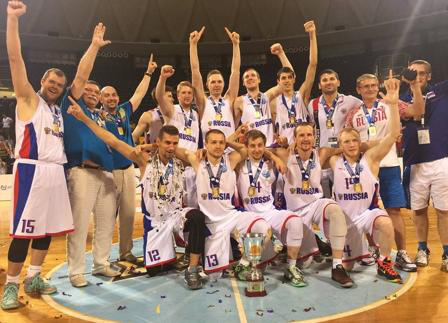

In [13]:

idx = random.randint(0, len(df_pred))
path = df_pred['image_id'][idx]
pred_label = df_pred['label'][idx]
img = Image.open(f'data/test/{path}')
print(pred_label)
img